In [ ]:
#보스턴의 집 값 예측

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
boston_df = pd.DataFrame(boston.data, columns=boston.featrue_names)
boston_df['PRICE'] = boston.target
boston_df.head()

In [ ]:
boston_df.shape

In [ ]:
boston_df.isna().sum()

In [ ]:
boston_df.duplicated().sum()

NameError: name 'boston_df' is not defined

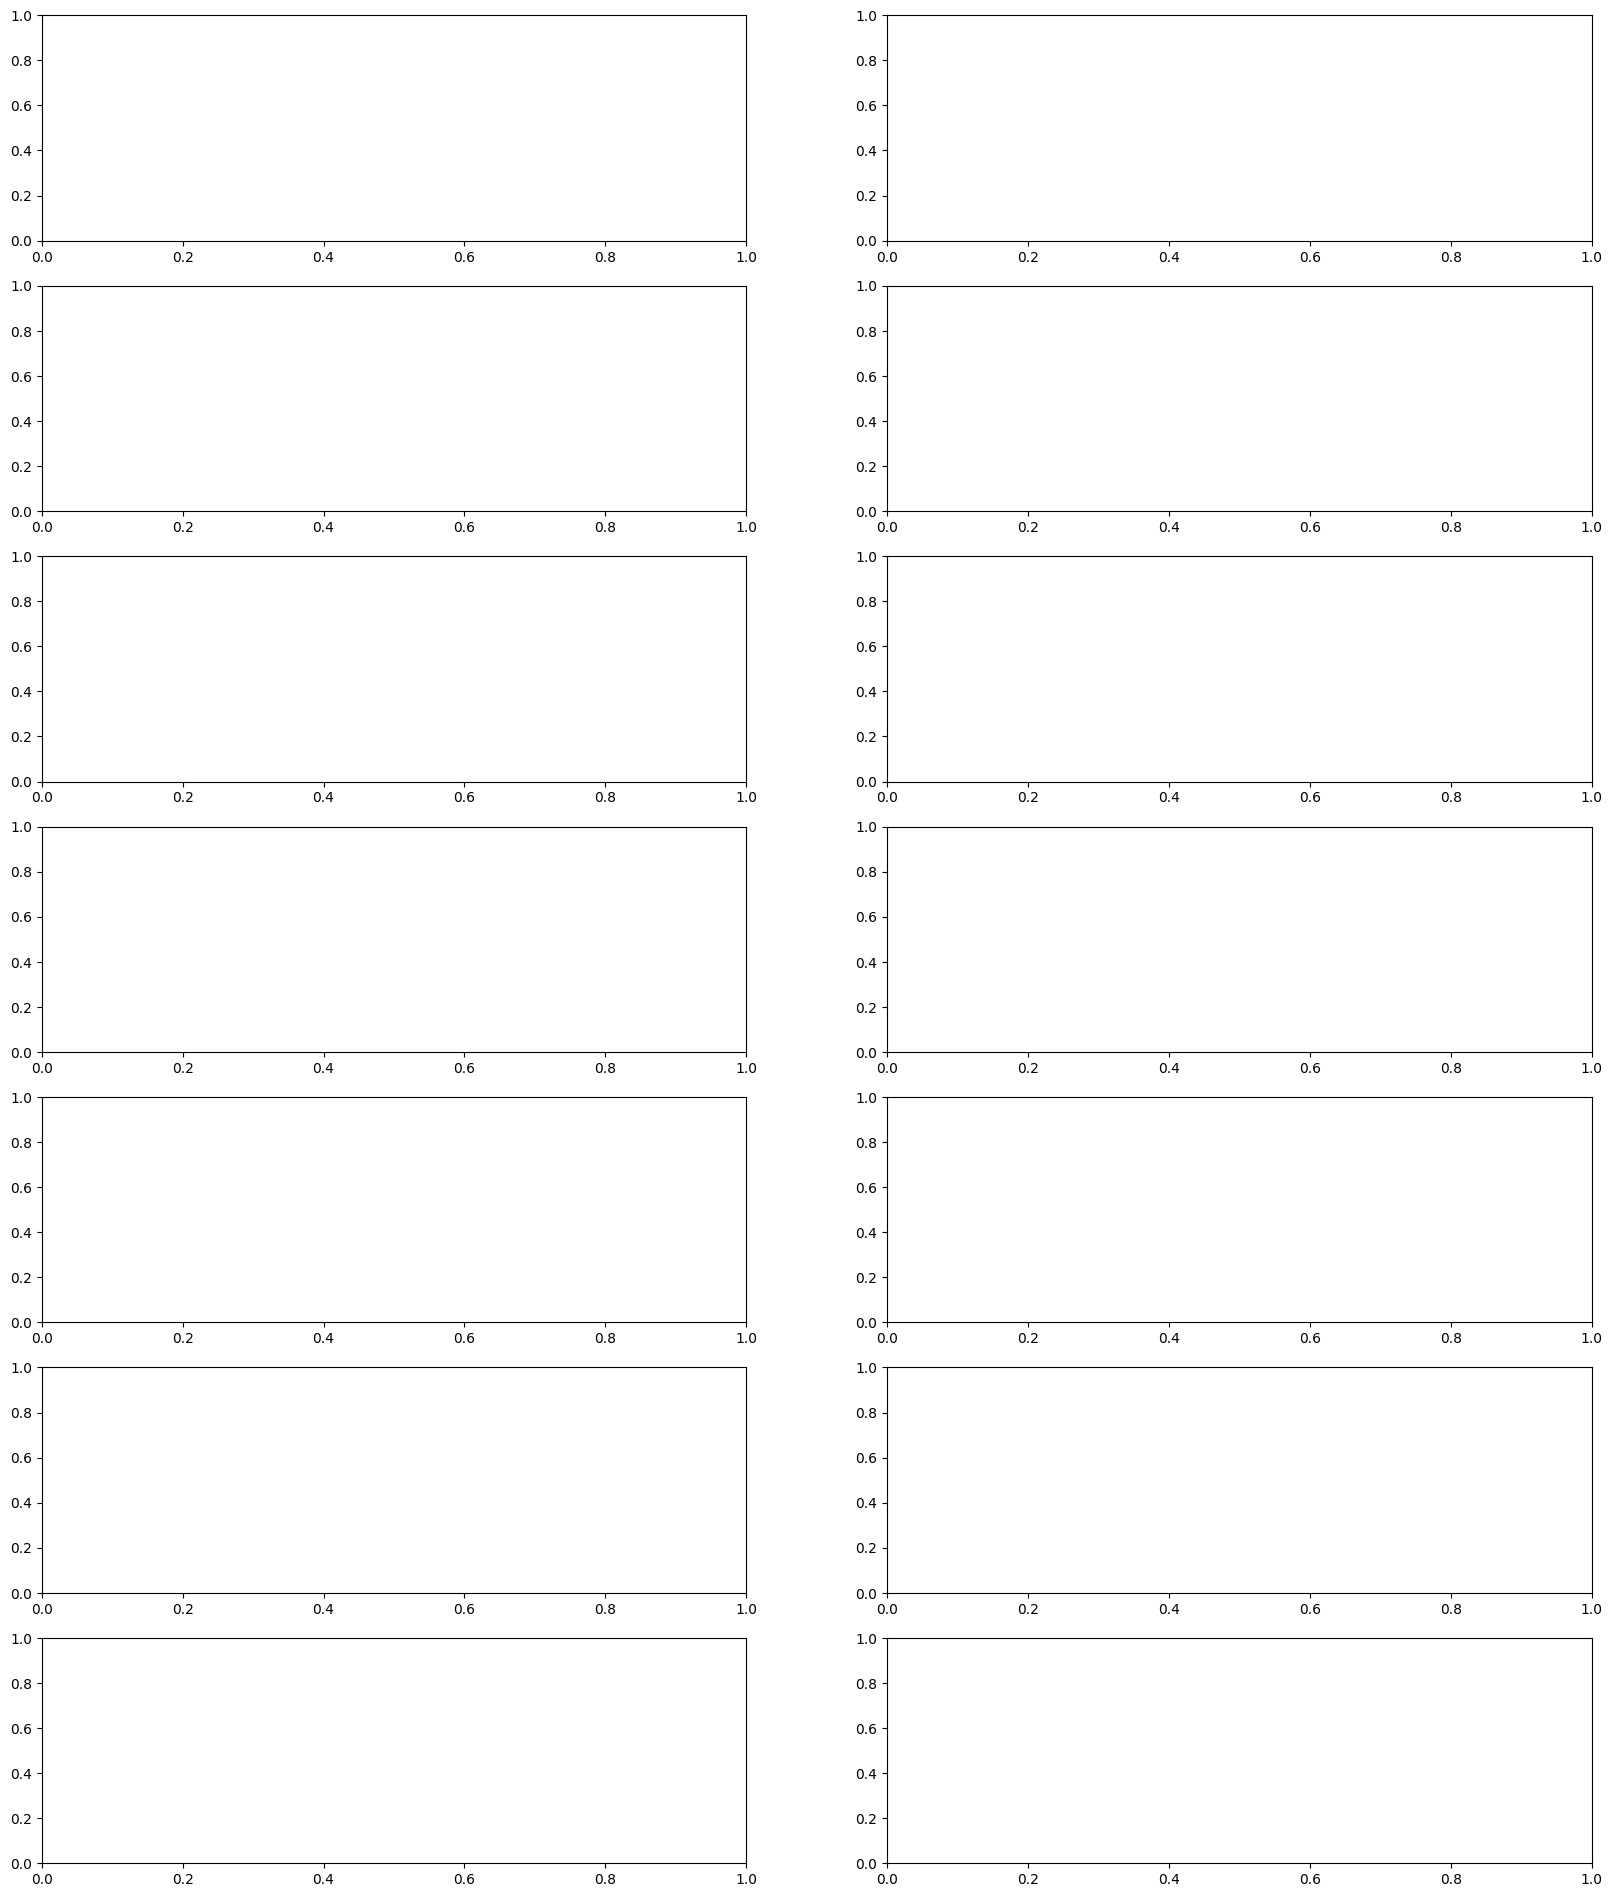

In [4]:
#데이터 분포 확인 - 히스토그램

nrows = 7
ncols = 2

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20,24)

for i in range(nrows):
    for j in range(ncols):
        num = i * ncols + j
        sns.histplot(x=boston_df.colums)

In [ ]:
#데이터 분포 확인 - 산점도

nrows = 7
ncols = 2

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20,24)

for i in range(nrows):
    for j in range(ncols):
        num = i * ncols + j
        sns.scatterplot(x=boston_df.columns[num], y='PRICE', data = boston_df, ax = axs[i][j])
        

In [ ]:
#데이터 분포 확인 - 변수 상관관계
boston_df.corr()

In [ ]:
np.abs(boston_df.corr()['PRICE'].sort_values(ascending=False))

In [ ]:
#데이터 분할
from sklearn.model_selection import train_test_split

y = boston_df['PRICE']
x = boston_df.drop(['PRICE'], axis = 1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)